In [ ]:
#|default_exp compute_diffusion_curvature_of_battery
from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from fastcore.all import *
import numpy as np
from nbdev import show_doc
%load_ext autoreload
%autoreload 2

# 3a1 Computing the diffusion curvature of the battery

In [ ]:
name = "t32nodecayMeanFixedk5t25"

In [ ]:
import graphtools
# from diffusion_curvature.graphtools import DiffusionCurvature
from diffusion_curvature.core import DiffusionCurvature
# def diffusion_curvature_of_pt_graphtools(u):
#     X = u[0]
#     dim = u[1]
#     G = graphtools.Graph(X, anisotropy=1, knn=15)
#     DC = DiffusionCurvature(t=15)
#     G = DC.curvature(G, dimension=dim)
#     return G.ks[0]
def diffusion_curvature_of_pt(X, dim):
    G = graphtools.Graph(X, anisotropy=1, knn=5, decay=None).to_pygsp()
    DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Mean Fixed",
        comparison_method="Subtraction",
        points_per_cluster=None, # construct separate comparison spaces around each point
        comparison_space_size_factor=1
    )
    ks = DC.curvature(G, t=25, dim=dim, knn=5, idx=0)
    return ks


In [ ]:
# load curvature battery
import deepdish
battery_file = "/home/piriac/data/diffusion_curvature/Curvature_Colosseum_dikey.h5"
CC = deepdish.io.load(battery_file)

In [ ]:
#|export
from tqdm.auto import tqdm, trange
from fastcore.all import *
# from fastprogress.fastprogress import master_bar, progress_bar
# Iterate through the battery and compute the diffusion curvature
# store it in a new dictionary
def compute_curvature_on_battery(
        curvature_function, # fn that, given X and dim, returns the curvature of the first point
        CC, # the battery dictionary
        ):
    computed_curvature = {}
    for d in tqdm(CC['dims'], desc="intrinsic dimensions"):
        computed_curvature[d] = {}
        for c in tqdm(CC[d]['codims'], leave=False, desc='codimensions'):
            computed_curvature[d][c] = {}
            for noise_level in tqdm(CC[d][c]['noise_levels'], leave=False, desc="Noise Levels"):
                computed_curvature[d][c][noise_level] = {}
                computed_curvature[d][c][noise_level]['k'] = []
                # apply curvature function in parallel
                # us = [(CC[d][c][noise_level]['Xs'][i], d) for i in range(len(CC[d][c][noise_level]['Xs']))]
                # ks = parallel(curvature_function, us, n_workers=25)
                # computed_curvature[d][c][noise_level]['k'] = ks
                for i in trange(len(CC[d][c][noise_level]['Xs']), leave=False, desc="Samples"):
                    X = CC[d][c][noise_level]['Xs'][i]
                    k = curvature_function(X, d)
                    computed_curvature[d][c][noise_level]['k'].append(k)
    return computed_curvature

In [ ]:
saved_calcs = f"/home/piriac/data/diffusion_curvature/computed_diffusion_curvatures_core_{name}.h5"
if os.path.exists(saved_calcs):
    print(f"Loading saved calculations from {saved_calcs}")
    computed_diffusion_curvatures = deepdish.io.load(saved_calcs)
else:
    computed_diffusion_curvatures = compute_curvature_on_battery(diffusion_curvature_of_pt, CC)
    deepdish.io.save(f"/home/piriac/data/diffusion_curvature/computed_diffusion_curvatures_core_{name}.h5", computed_diffusion_curvatures)

intrinsic dimensions:   0%|          | 0/4 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

2023-11-13 16:59:56.437387: W external/xla/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 25370427392
CUDA backend failed to initialize: INTERNAL: no supported devices found for platform CUDA (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

# Pearson Correlations

In [ ]:
#|export
# compute the pearson correlations between the computed curvature and the true curvature
from scipy.stats import pearsonr
def compute_correlations(
        computed_curvature, # the computed curvature
        CC, # the battery dictionary
        ):
    correlations = {}
    for d in tqdm(CC['dims'], desc="intrinsic dimensions"):
        correlations[d] = {}
        for c in tqdm(CC[d]['codims'], leave=False, desc='codimensions'):
            correlations[d][c] = {}
            for noise_level in tqdm(CC[d][c]['noise_levels'], leave=False, desc="Noise Levels"):
                correlations[d][c][noise_level] = {}
                correlations[d][c][noise_level]['r'] = []
                correlations[d][c][noise_level]['p'] = []
                # for i in trange(len(CC[d][c][noise_level]['Xs']), leave=False, desc="Samples"):
                k = computed_curvature[d][c][noise_level]['k']
                k_true = CC[d][c][noise_level]['k']
                r, p = pearsonr(k, k_true)
                correlations[d][c][noise_level]['r'] = r
                correlations[d][c][noise_level]['p'] = p
    return correlations

In [ ]:
dc_curvature_correlations = compute_correlations(computed_diffusion_curvatures, CC)

intrinsic dimensions:   0%|          | 0/4 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#|export
# Make a latex table of the correlations, both r and p values, with dimension in the rows and noise level in the columns
from tabulate import tabulate
def result_table(
        correlations, # dictionary of correlations
        c:int, # codimension
        style = 'fancy_grid',
        keys = ['r','p']
        ):
    noise_levels = correlations[correlations.keys().__iter__().__next__()][c].keys()
    print("Codimension = ",c)
    table = tabulate(
        [[d] + [f"{correlations[d][c][noise_level][keys[0]]:.{3}f}{'/' + str(correlations[d][c][noise_level][keys[1]])[:4] if len(keys) > 1 else ''}" for noise_level in noise_levels] for d in correlations.keys()],
        headers=['dim'] + [f"Noise = {nl}" for nl in noise_levels],
        tablefmt=style, #latex_raw
        floatfmt=".2f",
        )
    print(table)
    return table

In [ ]:
table = result_table(dc_curvature_correlations, c=1)

Codimension =  1
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.277/0.05    │ 0.096/0.50     │ 0.227/0.11    │ 0.300/0.03    │ 0.362/0.00    │ 0.416/0.00    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.505/0.00    │ 0.342/0.01     │ 0.575/1.26    │ 0.372/0.00    │ 0.409/0.00    │ 0.361/0.00    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.613/2.22    │ 0.631/8.91     │ 0.404/0.00    │ 0.416/0.00    │ 0.365/0.00    │ 0.371/0.00    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.559/2.45

In [ ]:
table = result_table(dc_curvature_correlations, c=2)

Codimension =  2
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.112/0.43    │ 0.228/0.11     │ 0.001/0.99    │ 0.178/0.21    │ 0.139/0.33    │ 0.290/0.04    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.577/1.13    │ 0.454/0.00     │ 0.395/0.00    │ 0.346/0.01    │ -0.022/0.87   │ 0.156/0.27    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.596/4.84    │ 0.598/4.52     │ 0.412/0.00    │ 0.548/3.74    │ 0.480/0.00    │ 0.420/0.00    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.661/1.77

In [ ]:
table = result_table(dc_curvature_correlations, c=3)

Codimension =  3
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.101/0.48    │ 0.288/0.04     │ 0.068/0.63    │ 0.176/0.22    │ 0.398/0.00    │ 0.144/0.31    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.592/6.07    │ 0.376/0.00     │ 0.407/0.00    │ 0.410/0.00    │ 0.217/0.13    │ 0.092/0.52    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.725/2.56    │ 0.642/5.07     │ 0.507/0.00    │ 0.704/1.20    │ 0.306/0.03    │ 0.414/0.00    │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.489/0.00

In [ ]:
table_latex = result_table(dc_curvature_correlations, c=1, style='latex_raw')
table_latex += result_table(dc_curvature_correlations, c=2, style='latex_raw')
table_latex += result_table(dc_curvature_correlations, c=3, style='latex_raw')

Codimension =  1
\begin{tabular}{rllllll}
\hline
   dim & Noise = 0.0   & Noise = 0.05   & Noise = 0.1   & Noise = 0.2   & Noise = 0.3   & Noise = 0.5   \\
\hline
     2 & 0.277/0.05    & 0.096/0.50     & 0.227/0.11    & 0.300/0.03    & 0.362/0.00    & 0.416/0.00    \\
     3 & 0.505/0.00    & 0.342/0.01     & 0.575/1.26    & 0.372/0.00    & 0.409/0.00    & 0.361/0.00    \\
     4 & 0.613/2.22    & 0.631/8.91     & 0.404/0.00    & 0.416/0.00    & 0.365/0.00    & 0.371/0.00    \\
     5 & 0.559/2.45    & 0.459/0.00     & 0.164/0.25    & 0.521/0.00    & 0.504/0.00    & 0.431/0.00    \\
\hline
\end{tabular}
Codimension =  2
\begin{tabular}{rllllll}
\hline
   dim & Noise = 0.0   & Noise = 0.05   & Noise = 0.1   & Noise = 0.2   & Noise = 0.3   & Noise = 0.5   \\
\hline
     2 & 0.112/0.43    & 0.228/0.11     & 0.001/0.99    & 0.178/0.21    & 0.139/0.33    & 0.290/0.04    \\
     3 & 0.577/1.13    & 0.454/0.00     & 0.395/0.00    & 0.346/0.01    & -0.022/0.87   & 0.156/0.27    \\
     4 & 0.

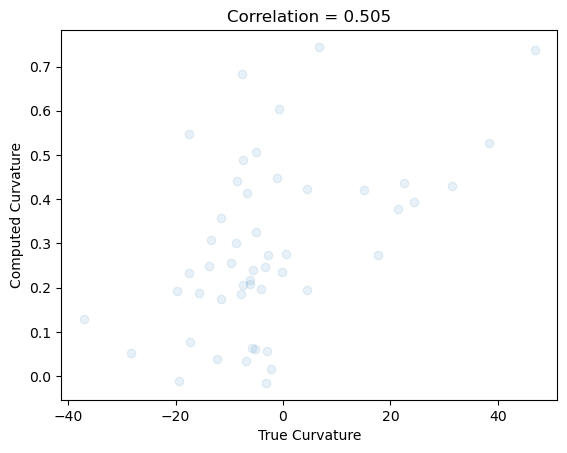

In [ ]:
import matplotlib.pyplot as plt
d = 3
c = 1
noise_level = 0.0
plt.scatter(CC[d][c][noise_level]['k'], computed_diffusion_curvatures[d][c][noise_level]['k'], alpha=0.1)
plt.xlabel("True Curvature")
plt.ylabel("Computed Curvature")
plt.title(f"Correlation = {dc_curvature_correlations[d][c][noise_level]['r']:.3f}")
plt.show()

# Fidelity of Sign

The above shows that the *unsigned* diffusion curvature correlates robustly with the true curvature. Let's measure how well the sign is predicted by diffusion curvature. 

In [ ]:
#|export
import numpy as np
def compute_sign_score(
        computed_curvature, # the computed curvature
        CC, # the battery dictionary
        ):
    correlations = {}
    for d in tqdm(CC['dims'], desc="intrinsic dimensions"):
        correlations[d] = {}
        for c in CC[d]['codims']:
            correlations[d][c] = {}
            for noise_level in tqdm(CC[d][c]['noise_levels'], leave=False, desc="Noise Levels"):
                correlations[d][c][noise_level] = {}
                correlations[d][c][noise_level]['r'] = []
                correlations[d][c][noise_level]['p'] = []
                # for i in trange(len(CC[d][c][noise_level]['Xs']), leave=False, desc="Samples"):
                k = computed_curvature[d][c][noise_level]['k']
                k_true = CC[d][c][noise_level]['k']
                # measure the 'classification accuracy' of the signs.
                class_acc = np.sum(
                    (np.sign(k) == np.sign(k_true)).astype(int)
                ) / len(k)
                correlations[d][c][noise_level]['accuracy'] = class_acc
    return correlations

In [ ]:
sign_accs = compute_sign_score(computed_diffusion_curvatures, CC)

intrinsic dimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
table = result_table(sign_accs, c=2, keys=['accuracy'])

Codimension =  2
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │   Noise = 0.0 │   Noise = 0.05 │   Noise = 0.1 │   Noise = 0.2 │   Noise = 0.3 │   Noise = 0.5 │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │          0.58 │           0.60 │          0.62 │          0.72 │          0.68 │          0.58 │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │          0.24 │           0.26 │          0.18 │          0.38 │          0.66 │          0.64 │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │          0.18 │           0.12 │          0.10 │          0.18 │          0.08 │          0.20 │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │          0

In [ ]:
#|hide
!nbdev_export